In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

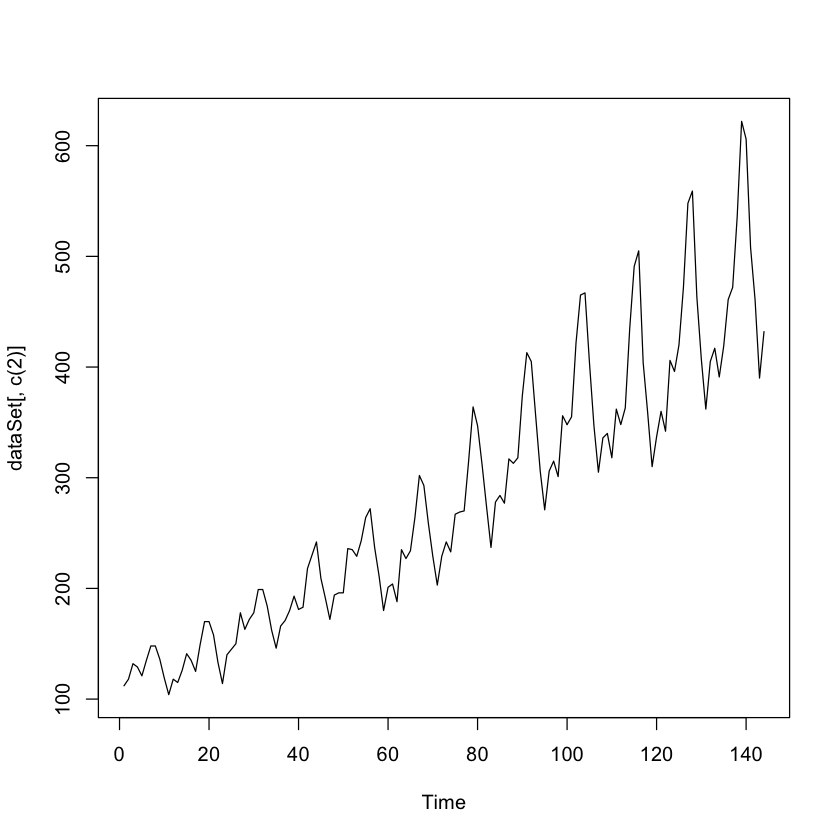

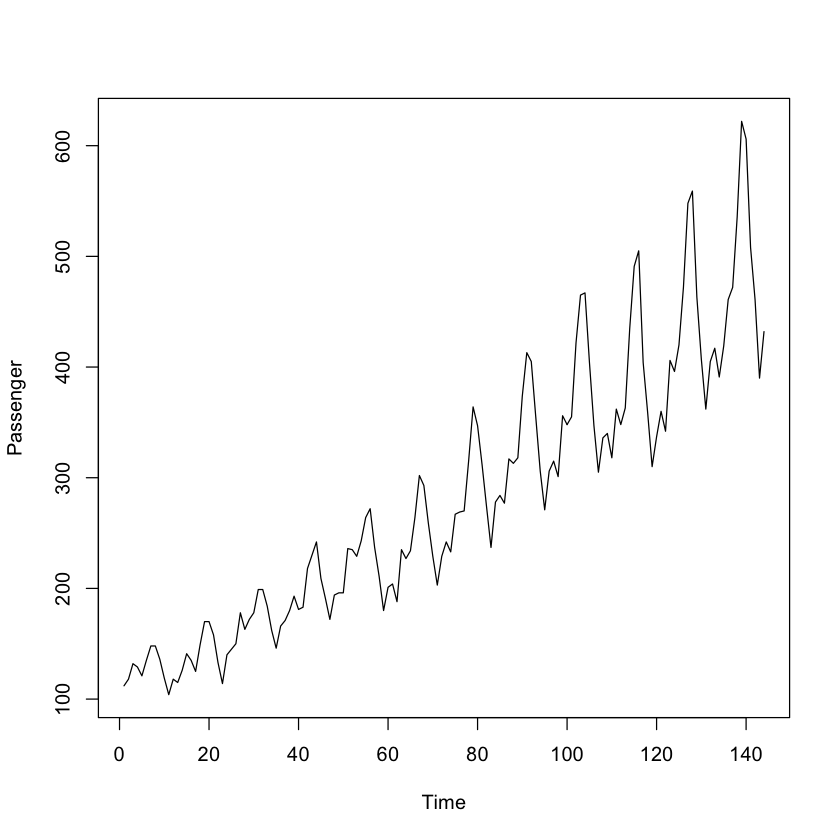

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])


Call:
arima(x = dataSet, order = c(0, 1, 0))


sigma^2 estimated as 1136:  log likelihood = -705.95,  aic = 1413.91

	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 61.68, df = 10, p-value = 1.741e-09

Model df: 0.   Total lags used: 10

[1] 0.9230166


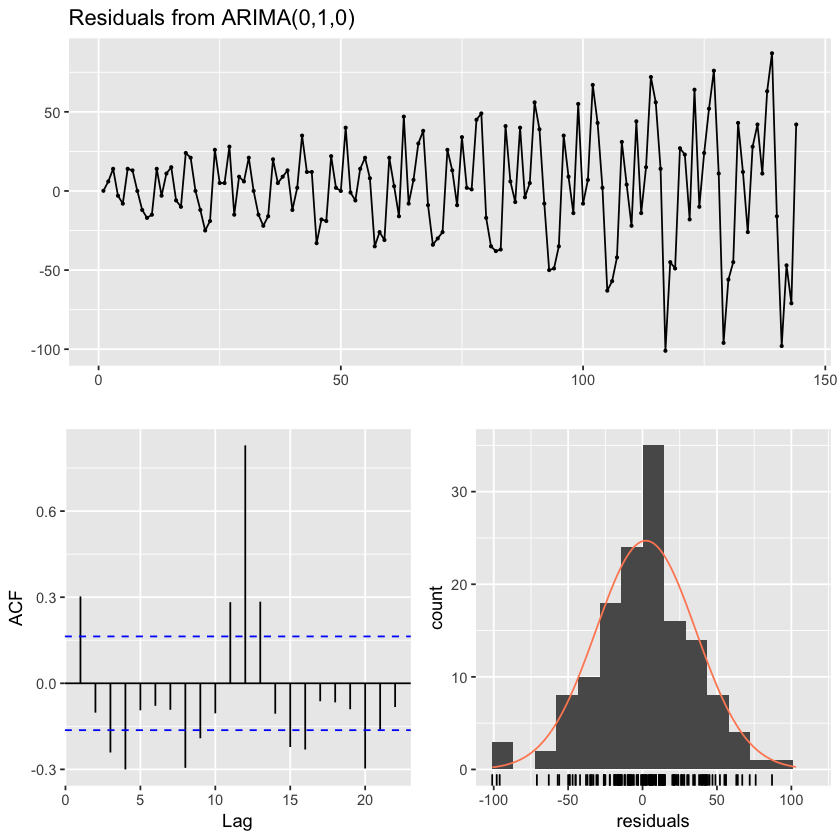

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145            432 388.7984 475.2016 365.9288 498.0712
146            432 370.9037 493.0963 338.5612 525.4388
147            432 357.1726 506.8274 317.5613 546.4387
148            432 345.5967 518.4033 299.8576 564.1424
149            432 335.3982 528.6018 284.2603 579.7397
150            432 326.1781 537.8219 270.1593 593.8407
151            432 317.6992 546.3008 257.1921 606.8079
152            432 309.8073 554.1927 245.1225 618.8775
153            432 302.3951 561.6049 233.7864 630.2136
154            432 295.3845 568.6155 223.0646 640.9354
155            432 288.7164 575.2836 212.8667 651.1333
156            432 282.3452 581.6548 203.1227 660.8773
157            432 276.2343 587.7657 193.7770 670.2230
158            432 270.3543 593.6457 184.7843 679.2157
159            432 264.6808 599.3192 176.1074 687.8926
160            432 259.1935 604.8065 167.7153 696.2847
161            432 253.8751 610.1249 159.5815 704.4185
162       

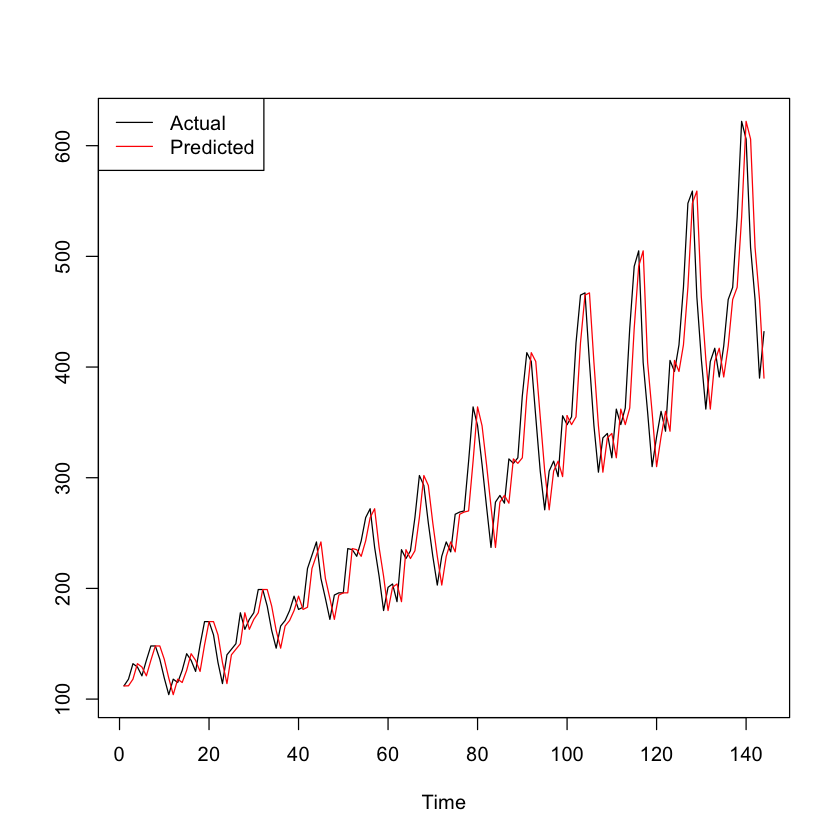

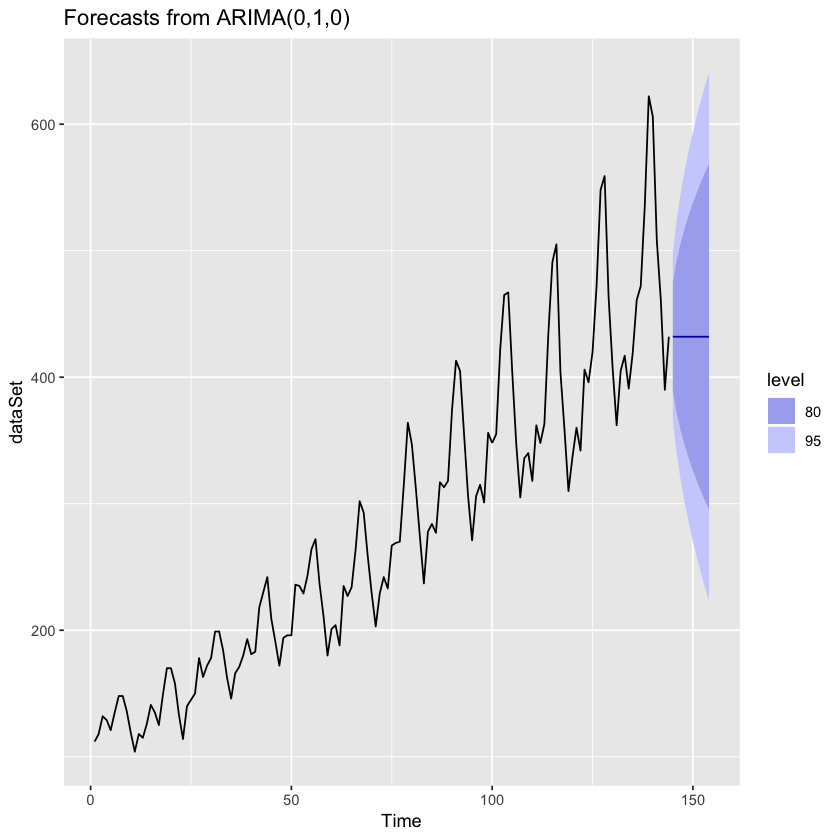

In [7]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(0,1,0))
print(fit_arima)
checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))